In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import statsmodels.api as sm 
from statsmodels.api import qqplot 
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow 
from scipy.stats import shapiro 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error #R-squared
from sklearn.model_selection import train_test_split #for train and test split
from statsmodels.api import qqplot 
from scipy.stats import shapiro, ttest_ind
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  
from sklearn import linear_model

In [3]:
#importing the data 
data = pd.read_excel("Student_data.xlsx",sheet_name="Data")

/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StudentID    395 non-null    int64 
 1   school2      395 non-null    object
 2   sex          395 non-null    object
 3   age          395 non-null    int64 
 4   address      395 non-null    object
 5   famsize      395 non-null    object
 6   Pstatus      395 non-null    object
 7   Medu         395 non-null    int64 
 8   Fedu         395 non-null    int64 
 9   Mjob         395 non-null    object
 10  Fjob         395 non-null    object
 11  reason       395 non-null    object
 12  guardian     395 non-null    object
 13  traveltime   395 non-null    int64 
 14  studytime    395 non-null    int64 
 15  failures     395 non-null    int64 
 16  schoolsup    395 non-null    object
 17  famsup       395 non-null    object
 18  paid         395 non-null    object
 19  activities   395 non-null    

In [5]:
# first 5 rows
data.head()

,StudentID,school2,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3,4,1,1,3,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3,3,1,1,3,4,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3,2,2,3,3,10,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2,2,1,1,5,2,15
4,5,GP,F,16,U,GT3,T,3,3,other,...,no,no,4,3,2,1,2,5,4,10


In [6]:
#looking at the columns of the dataset

print(data.columns.tolist())

['StudentID', 'school2', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Final_Grade']


In [7]:
data.describe()

,StudentID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,114.170924,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,99.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,198.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,296.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,395.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


In [8]:
#checking number of duplicates
print("Duplicates:", data.duplicated().sum())

#checking number of missing values
print("Missing values:", data.isna().sum().sum())

#checking number of columns with a single value
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')


In [9]:
data.isna().sum()

StudentID      0
school2        0
sex            0
age            0
address        0
famsize        0
Pstatus        0
Medu           0
Fedu           0
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime     0
studytime      0
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher         0
internet       0
romantic       0
famrel         0
freetime       0
goout          0
Dalc           0
Walc           0
health         0
absences       0
Final_Grade    0
dtype: int64

In [10]:
# Student ID is actually categorical values and they do not have numeric meaning 

data = data.drop(['StudentID'   ], axis = 1 )

In [11]:
# separate data into numeric and object parts
data_numeric = data.select_dtypes(exclude=["object"])
data_categorical = data.select_dtypes(include="object")
data_categorical.head()

,school2,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [12]:
data_numeric.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
0,18,4,4,2,2,0,4,3,4,1,1,3,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,10


<AxesSubplot:>

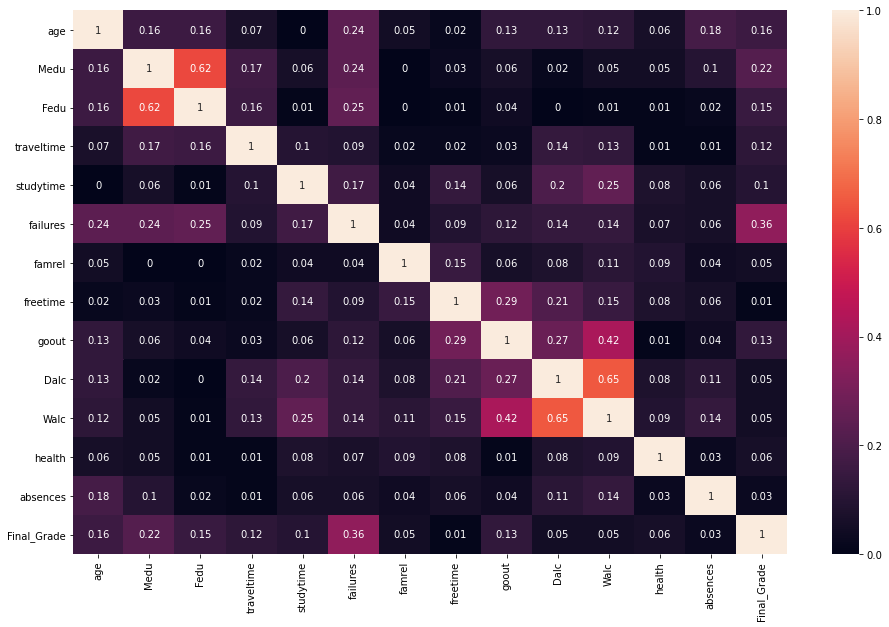

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(data_numeric.corr().abs().round(2),annot=True)
# sns.heatmap(df_numeric_features.drop(["length"],axis=1).corr().abs()>=0.75)

In [84]:
# There is no very high correlation(0.8) between 2 independant variables.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


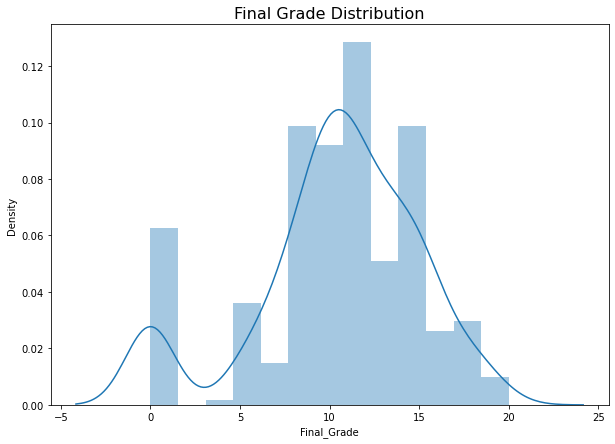

In [15]:
plt.figure(figsize = (10,7))
sns.distplot(data.Final_Grade)
plt.title("Final Grade Distribution",fontsize = 16) 
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


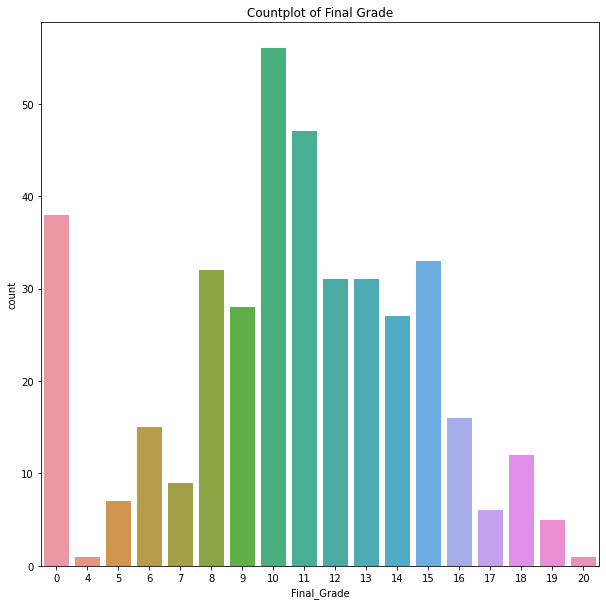

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(data.Final_Grade)
plt.title("Countplot of Final Grade")
plt.show()

## Model Building

In [18]:
# dummy 

data_dummies = pd.get_dummies(data_categorical, drop_first = True)
data_dummies.head()

,school2_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,0,0,0,0,...,1,0,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,0,0,0,0,...,1,0,0,1,1,1,1,1,1,1
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,1,0,1,1,0,0


In [19]:
data_model = data_numeric.join(data_dummies, how = 'left')

In [20]:
data_model.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [21]:
Y = data_model.Final_Grade
X = data_model.drop('Final_Grade', axis = 1)
X = sm.add_constant(X)
X.shape + Y.values.reshape((-1,1)).shape

(395, 40, 395, 1)

In [22]:
# train-test split data
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25, random_state=42)
train_x.shape

(296, 40)

In [23]:
# linear model
model_linear = sm.OLS(train_y, train_x)
results = model_linear.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2.507
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           1.02e-05
Time:                        19:38:28   Log-Likelihood:                -817.20
No. Observations:                 296   AIC:                             1714.
Df Residuals:                     256   BIC:                             1862.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.6675      5.186      2.636      0.009       3.455      23.880
age                  -0.3840      0.248     -1.547      0.123      -0.873       0.105
Medu                  0.4395      0.382      1.151      0.251      -0.313       1.192
Fedu                 -0.3869      0.330     -1.173      0.242      -1.036       0.262
traveltime           -0.1246      0.402     -0.310      0.757      -0.916       0.667
studytime             0.5529      0.349      1.586      0.114      -0.134       1.239
failures             -1.7348      0.388     -4.469      0.000      -2.499      -0.970
famrel                0.3468      0.302      1.148      0.252      -0.248       0.942
freetime              0.1629      0.270      0.602      0.547      -0.370       0.696
goout                -0.5638      0.275     -2.049      0.041      -1.106      -0.022
Dalc                 -0.2700      0.381     -0.709      0.479      -1.020       0.480
Walc                  0.2198      0.293      0.749      0.454      -0.358       0.797
health               -0.1202      0.186     -0.648      0.518      -0.486       0.245
absences              0.0588      0.032      1.842      0.067      -0.004       0.122
school2_MS            0.9703      0.935      1.038      0.300      -0.871       2.811
sex_M                 1.4015      0.599      2.341      0.020       0.223       2.580
address_U             0.5103      0.673      0.758      0.449      -0.815       1.836
famsize_LE3           0.4941      0.571      0.865      0.388      -0.630       1.619
Pstatus_T            -0.5986      0.872     -0.687      0.493      -2.315       1.118
Mjob_health           1.4533      1.287      1.129      0.260      -1.081       3.988
Mjob_other            0.1598      0.814      0.196      0.844      -1.442       1.762
Mjob_services         0.7999      0.892      0.897      0.371      -0.957       2.557
Mjob_teacher         -0.6072      1.208     -0.503      0.616      -2.986       1.771
Fjob_health           0.1619      1.586      0.102      0.919      -2.960       3.284
Fjob_other           -0.8159      1.102     -0.740      0.460      -2.987       1.355
Fjob_services        -0.3438      1.172     -0.293      0.770      -2.652       1.965
Fjob_teacher          0.9266      1.472      0.630      0.529      -1.972       3.825
reason_home          -0.4286      0.664     -0.645      0.519      -1.737       0.879
reason_other          0.5870      0.916      0.641      0.522      -1.217       2.391
reason_reputation     0.6131      0.681      0.900      0.369      -0.728       1.955
guardian_mother       0.5829      0.650      0.897      0.371      -0.697       1.863
guardian_other        1.2085      1.125      1.074      0.284      -1.007       3.424
schoolsup_yes        -0.9273      0.749     -1.239      0.217      -2.402

In [24]:
#predicting for train and test data
Y1_linear = results.predict(sm.add_constant(X))
Y0_linear = results.predict(X)

In [25]:
#let's see r-squared for train and test sets for the initial model
print("R-squared Train:",r2_score(Y,Y0_linear))
print("R-squared Test:",r2_score(Y,Y1_linear))

R-squared Train: 0.256183043975479
R-squared Test: 0.256183043975479


## Feature Engineering

In [26]:
# significant variables
results.pvalues[results.pvalues<0.05]

const       0.008912
failures    0.000012
goout       0.041466
sex_M       0.020001
dtype: float64

In [27]:
results.pvalues[results.pvalues>0.05]

age                  0.123004
Medu                 0.251000
Fedu                 0.241772
traveltime           0.756747
studytime            0.113928
famrel               0.252163
freetime             0.547423
Dalc                 0.479000
Walc                 0.454254
health               0.517646
absences             0.066650
school2_MS           0.300240
address_U            0.449126
famsize_LE3          0.387659
Pstatus_T            0.492966
Mjob_health          0.259887
Mjob_other           0.844474
Mjob_services        0.370765
Mjob_teacher         0.615560
Fjob_health          0.918743
Fjob_other           0.459843
Fjob_services        0.769542
Fjob_teacher         0.529492
reason_home          0.519311
reason_other         0.522328
reason_reputation    0.368999
guardian_mother      0.370682
guardian_other       0.283840
schoolsup_yes        0.216622
famsup_yes           0.069359
paid_yes             0.131194
activities_yes       0.359716
nursery_yes          0.461376
higher_yes

In [87]:
# eliminate some unsignificant features according to p-value
p_values = results.pvalues.round(3).reset_index().rename(
    columns={
        'index':'features',
        0: 'p_value'
    }
).sort_values("p_value")

In [29]:
bad_features_data = p_values[p_values.p_value > 0.5]
bad_features = bad_features_data.features.tolist()
print(bad_features)

['health', 'reason_home', 'reason_other', 'Fjob_teacher', 'freetime', 'Mjob_teacher', 'traveltime', 'Fjob_services', 'Mjob_other', 'Fjob_health']


In [30]:
# multiple regressions without insignificant variables  (eliminateing one by one)
for feature in bad_features:
    # temporary variables to save the new dataset
    temporary_train_x = train_x.drop([feature], axis = 1)
    temporary_test_x = test_x.drop([feature], axis = 1)
    # temporary models to see how it changes if bad features are eliminated
    temporary_model = sm.OLS(train_y, temporary_train_x)
    temporary_results = temporary_model.fit()
    print(f"This is a evaluation of the model without {feature.upper()} feature")
    print("Train R^2:",temporary_results.rsquared.round(3))
    print("Train R^2 Adjusted:",temporary_results.rsquared_adj.round(3))
    # check prediction on the test set
    temporary_y_pred=temporary_results.predict(temporary_test_x)
    print('R^2_test:', r2_score(test_y, temporary_y_pred).round(3))
    print('RMSE test:', (mean_squared_error(test_y, temporary_y_pred)**0.5).round(3))
    print()

This is a evaluation of the model without HEALTH feature
Train R^2: 0.275
Train R^2 Adjusted: 0.168
R^2_test: 0.198
RMSE test: 4.299

This is a evaluation of the model without REASON_HOME feature
Train R^2: 0.275
Train R^2 Adjusted: 0.168
R^2_test: 0.211
RMSE test: 4.263

This is a evaluation of the model without REASON_OTHER feature
Train R^2: 0.275
Train R^2 Adjusted: 0.168
R^2_test: 0.198
RMSE test: 4.298

This is a evaluation of the model without FJOB_TEACHER feature
Train R^2: 0.275
Train R^2 Adjusted: 0.168
R^2_test: 0.198
RMSE test: 4.299

This is a evaluation of the model without FREETIME feature
Train R^2: 0.275
Train R^2 Adjusted: 0.168
R^2_test: 0.195
RMSE test: 4.306

This is a evaluation of the model without MJOB_TEACHER feature
Train R^2: 0.276
Train R^2 Adjusted: 0.169
R^2_test: 0.196
RMSE test: 4.304

This is a evaluation of the model without TRAVELTIME feature
Train R^2: 0.276
Train R^2 Adjusted: 0.169
R^2_test: 0.201
RMSE test: 4.291

This is a evaluation of the model

In [31]:
# transformm to the binary feature

data_categorical.Fjob = np.where(data_categorical.Fjob == 'other', 1, 0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [32]:
data_categorical.Fjob.value_counts()

1    217
0    178
Name: Fjob, dtype: int64

In [33]:
data_categorical.Mjob.value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [88]:
# as some of the categories are not significant we can transform them and merge into others
data_categorical.Mjob = np.where(data_categorical.Mjob == 'health' , 'other', data_categorical.Mjob)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [89]:
data_categorical.Mjob = np.where(data_categorical.Mjob == 'teacher' , 'other', data_categorical.Mjob)

In [90]:
data_categorical.Mjob = np.where(data_categorical.Mjob == 'at_home' , 'other', data_categorical.Mjob)

In [37]:
data_categorical.Mjob.value_counts()

other       292
services    103
Name: Mjob, dtype: int64

In [38]:
data_categorical.Mjob = np.where(data_categorical.Mjob == 'other', 1, 0)

In [39]:
data_categorical.Mjob.value_counts()

1    292
0    103
Name: Mjob, dtype: int64

In [40]:
data_categorical.head()

,school2,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,1,0,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,1,1,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,1,1,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,1,0,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,1,1,home,father,no,yes,yes,no,yes,yes,no,no


In [41]:
data_categorical.guardian.value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

In [42]:
data_categorical.guardian = np.where(data_categorical.Mjob == 'other' , 'mother', data_categorical.guardian)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
data_categorical.guardian = np.where(data_categorical.guardian == 'father', 1, 0)

In [44]:
data_categorical.guardian.value_counts()

0    305
1     90
Name: guardian, dtype: int64

In [45]:
# as we have mothers mostly as guardians, I decided to remove the other options

In [46]:
data_categorical.reason.value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

In [47]:
data_categorical.reason = np.where(data_categorical.reason == 'course' , 'general_reason', data_categorical.reason)

In [48]:
data_categorical.reason = np.where(data_categorical.reason == 'home' , 'general_reason', data_categorical.reason)

In [49]:
data_categorical.reason = np.where(data_categorical.reason == 'reputation' , 'general_reason', data_categorical.reason)

In [50]:
data_categorical.reason = np.where(data_categorical.reason == 'other' , 'general_reason', data_categorical.reason)

In [91]:
# all the reason variables were not significant, so they were classified into one "general reason"

In [52]:
data_numeric1=data_numeric.drop(['freetime',  'traveltime','health'], axis=1)

In [92]:
# drop freetime and traveltime, health as they are not significant

In [93]:
data_numeric1.absences=np.exp(-data_numeric1.absences)

In [94]:
data_numeric1.columns.tolist()

['age',
 'Medu',
 'Fedu',
 'studytime',
 'failures',
 'famrel',
 'goout',
 'Dalc',
 'Walc',
 'absences',
 'Final_Grade']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

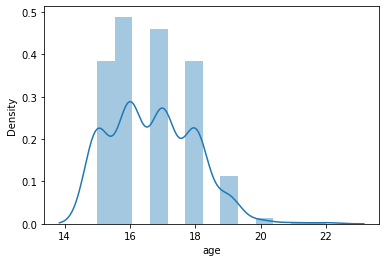

In [95]:
# examine the value distribution of  numeric features


sns.distplot(data_numeric1['age'])


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='studytime', ylabel='Density'>

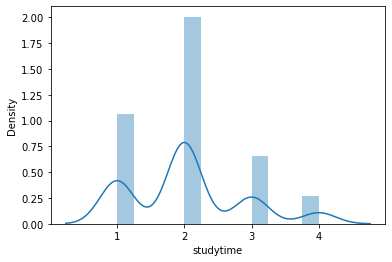

In [96]:

sns.distplot(data_numeric1['studytime'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Medu', ylabel='Density'>

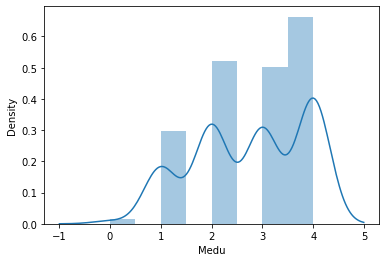

In [97]:

sns.distplot(data_numeric1['Medu'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fedu', ylabel='Density'>

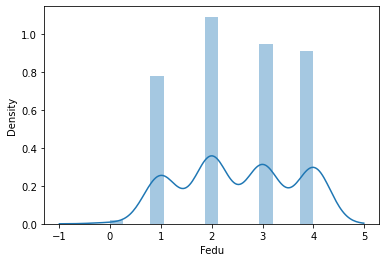

In [98]:

sns.distplot(data_numeric1['Fedu'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='failures', ylabel='Density'>

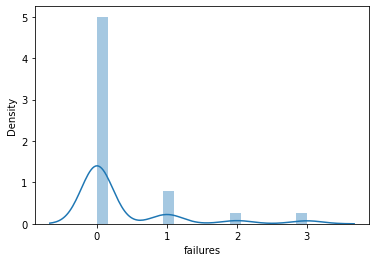

In [99]:

sns.distplot(data_numeric1['failures'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='famrel', ylabel='Density'>

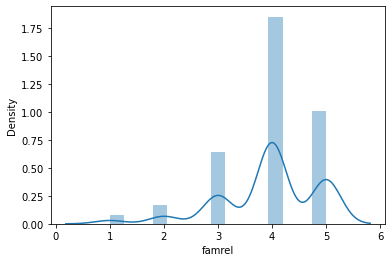

In [100]:

sns.distplot(data_numeric1['famrel'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='absences', ylabel='Density'>

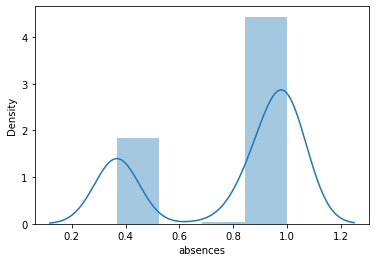

In [101]:

sns.distplot(data_numeric1['absences'])

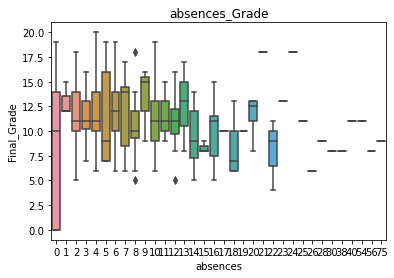

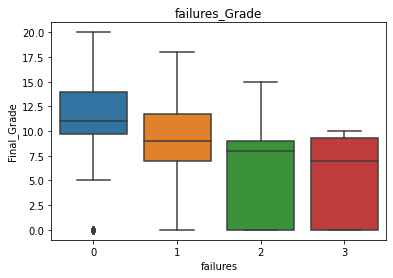

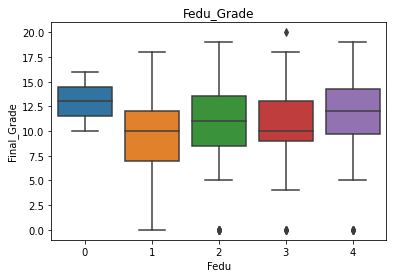

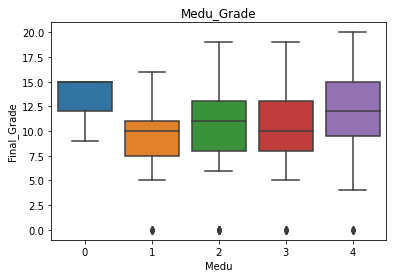

In [102]:
# boxplot for relationship between target and some object variables


for i in data_numeric1[['absences', 'failures','Fedu', 'Medu']]:
    sns.boxplot(x=data[i], y=data['Final_Grade'])
    plt.title(f"{i}_Grade")
    plt.show()

## Creating a new Model

In [103]:
# dummy 

data_dummies = pd.get_dummies(data_categorical, drop_first = True)
data_dummies.head()

,Fjob,guardian,school2_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_1,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0
1,1,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0
2,1,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0
3,0,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1
4,1,1,0,0,1,0,1,1,0,1,1,0,1,1,0,0


In [65]:
data_model1 = data_numeric1.join(data_dummies, how = 'left')

In [66]:
data_model1.head()

,age,Medu,Fedu,studytime,failures,famrel,goout,Dalc,Walc,absences,...,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,0,4,4,1,1,0.002479,...,0,0,1,0,0,0,1,1,0,0
1,17,1,1,2,0,5,3,1,1,0.018316,...,0,1,0,1,0,0,0,1,1,0
2,15,1,1,2,3,4,2,2,3,0.000045,...,1,1,1,0,1,0,1,1,1,0
3,15,4,2,3,0,3,2,1,1,0.135335,...,0,1,0,1,1,1,1,1,1,1
4,16,3,3,2,0,4,2,1,2,0.018316,...,0,1,0,1,1,0,1,1,0,0


In [67]:
Y = data_model1.Final_Grade
X = data_model1.drop('Final_Grade', axis = 1)
X = sm.add_constant(X)

In [68]:
# train test split data 

X0, X1, Y0, Y1 = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [72]:
# linear model 
model_linear1 = sm.OLS(Y0, X0)
results1 = model_linear1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     5.094
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           1.07e-12
Time:                        19:45:04   Log-Likelihood:                -805.81
No. Observations:                 296   AIC:                             1666.
Df Residuals:                     269   BIC:                             1765.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             16.1148      4.220      3.818      0.000       7.806      24.424
age               -0.3579      0.212     -1.692      0.092      -0.774       0.059
Medu               0.6111      0.289      2.115      0.035       0.042       1.180
Fedu              -0.2922      0.294     -0.992      0.322      -0.872       0.287
studytime          0.4332      0.313      1.384      0.168      -0.183       1.050
failures          -1.4630      0.352     -4.161      0.000      -2.155      -0.771
famrel             0.3895      0.271      1.439      0.151      -0.143       0.923
goout             -0.5509      0.240     -2.294      0.023      -1.024      -0.078
Dalc              -0.4089      0.340     -1.202      0.230      -1.079       0.261
Walc               0.0677      0.263      0.257      0.797      -0.450       0.586
absences          -3.3217      0.552     -6.013      0.000      -4.409      -2.234
Mjob              -0.5014      0.527     -0.952      0.342      -1.538       0.536
Fjob              -0.7103      0.509     -1.395      0.164      -1.712       0.292
guardian          -0.2979      0.572     -0.520      0.603      -1.425       0.829
school2_MS         0.9159      0.841      1.089      0.277      -0.739       2.571
sex_M              1.1281      0.529      2.134      0.034       0.087       2.169
address_U          0.4709      0.602      0.782      0.435      -0.715       1.657
famsize_LE3        0.5008      0.519      0.965      0.336      -0.521       1.523
Pstatus_T         -0.6457      0.796     -0.811      0.418      -2.213       0.922
schoolsup_yes     -1.0441      0.693     -1.507      0.133      -2.409       0.320
famsup_yes        -1.1321      0.517     -2.188      0.030      -2.151      -0.114
paid_yes           0.6570      0.514      1.279      0.202      -0.354       1.668
activities_yes    -0.6076      0.491     -1.238      0.217      -1.574       0.359
nursery_yes       -0.4113      0.597     -0.689      0.491      -1.587       0.764
higher_yes         1.7489      1.083      1.615      0.107      -0.383       3.881
internet_yes       0.7104      0.651      1.091      0.276      -0.572       1.993
romantic_yes      -0.4523      0.503     -0.899      0.370      -1.443       0.539
==============================================================================
Omnibus:                        2.693   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.723
Skew:                          -0.230   Prob(JB):                        0.256
Kurtosis:                       2.900   Cond. No.                         349.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# significant variables
results1.pvalues[results.pvalues<0.05]

const         1.667976e-04
Medu          3.531139e-02
failures      4.269352e-05
goout         2.254221e-02
absences      5.911597e-09
sex_M         3.375747e-02
famsup_yes    2.950433e-02
dtype: float64

In [86]:
results1.pvalues[results.pvalues>0.05]

age               0.091777
Fedu              0.321859
studytime         0.167646
famrel            0.151329
Dalc              0.230240
Walc              0.797031
Mjob              0.341978
Fjob              0.164074
guardian          0.603190
school2_MS        0.276938
address_U         0.435054
famsize_LE3       0.335574
Pstatus_T         0.418109
schoolsup_yes     0.133090
paid_yes          0.201920
activities_yes    0.216789
nursery_yes       0.491464
higher_yes        0.107429
internet_yes      0.276365
romantic_yes      0.369608
dtype: float64

## Checking LR assumptions using residual analysis


In [73]:
residuals=results1.resid
predicted_values=results1.predict()

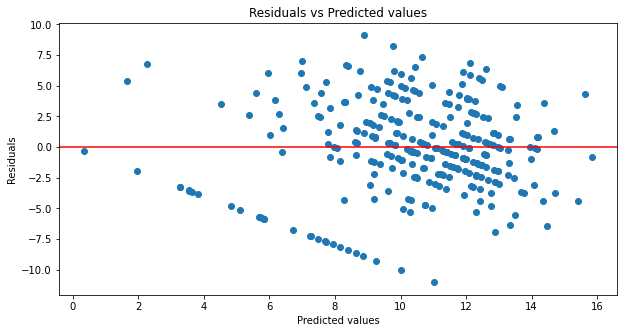

In [74]:
plt.figure(figsize=(10,5))
plt.scatter(predicted_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residuals vs Predicted values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


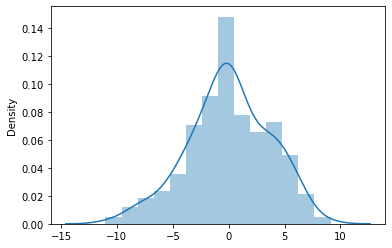

In [75]:
sns.distplot(residuals)
plt.show()

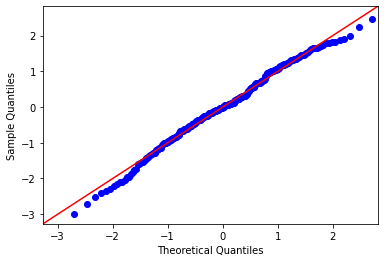

In [76]:
qqplot(residuals,fit=True, line='45')
plt.show()

In [77]:
# The residuals distribution plot shows that the distribution is approximately bell-shaped. QQ-plot shows that the there are some outliers, but overall the dots follow the line.

## Linearity and Equal variance

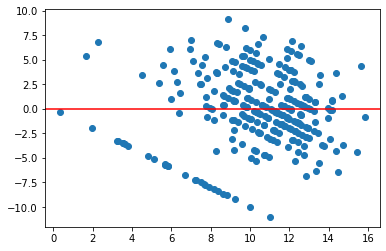

In [78]:
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='red')

In [79]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity

bnames = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 74.01096783315366), ('p-value', 1.6996542495990522e-06), ('f-value', 3.449399513256275), ('f p-value', 1.610804077839824e-07)]


In [80]:
# We have a big p-value, so we do not have enough evidence to reject the homoscedasticity assumtion. 

In [81]:
rnames = ["fstat", "p-value"]
rainbow = linear_rainbow(results)
print(list(zip(rnames, rainbow)))

[('fstat', 1.0620833262441225), ('p-value', 0.36667311614363535)]


In [82]:
# Linearity assumption is held (fail to reject), since we have a p-value>0.05.